In [1]:
import matplotlib.pyplot as plt

In [11]:
# LIN PROBING

# Original values (without dropout)
# original_values = {
#     "CONTRASTIVE": {"Alpha": 0.6778, "Age": 0.623, "RB": 0.807, "PH": 0.819, "Pendulum": 0.37},
#     "GENERATIVE": {"Alpha": 0.753, "Age": 0.610, "RB": 0.796, "PH": 0.759, "Pendulum": 0.74},
#     "GEN+CONTRASTIVE": {"Alpha": 0.703, "Age": 0.602, "RB": 0.808, "PH": 0.733, "Pendulum": 0.59},
#     "SIGMOID": {"Alpha": 0.757, "Age": 0.627, "RB": 0.786, "PH": 0.762, "Pendulum": 0.41}
# }

# # Values after dropout
# after_dropout = {
#     "CONTRASTIVE": {
#         "Alpha": [0.679, 0.678, 0.677, 0.67],
#         "Age": [0.62, 0.617, 0.612, 0.607],
#         "RB": [0.815, 0.81, 0.826, 0.799],
#         "PH": [0.807, 0.798, 0.796, 0.798],
#         "Pendulum": [0.36, 0.37, 0.37, 0.4]
#     },
#     "GENERATIVE": {
#         "Alpha": [0.755, 0.751, 0.745, 0.738],
#         "Age": [0.619, 0.619, 0.613, 0.603],
#         "RB": [0.795, 0.783, 0.771, 0.764],
#         "PH": [0.734, 0.727, 0.739, 0.725],
#         "Pendulum": [0.77, 0.71, 0.67, 0.7]
#     },
#     "GEN+CONTRASTIVE": {
#         "Alpha": [0.703, 0.703, 0.697, 0.686],
#         "Age": [0.605, 0.608, 0.608, 0.602],
#         "RB": [0.809, 0.801, 0.783, 0.771],
#         "PH": [0.735, 0.721, 0.72, 0.707],
#         "Pendulum": [0.6, 0.61, 0.6, 0.67]
#     },
#     "SIGMOID": {
#         "Alpha": [0.753, 0.754, 0.746, 0.735],
#         "Age": [0.623, 0.621, 0.614, 0.609],
#         "RB": [0.781, 0.762, 0.766, 0.731],
#         "PH": [0.747, 0.719, 0.72, 0.717],
#         "Pendulum": [0.41, 0.42, 0.43, 0.5]
#     }
# }

after_dropout = {
    "CONTRASTIVE": {
        "Alpha": [0.692, 0.689, 0.684, 0.678],
        "Age": [0.629, 0.632, 0.624, 0.615],
        "RB": [0.842, 0.836, 0.838, 0.841],
        "PH": [0.823, 0.822, 0.821, 0.795],
        "Pendulum": [0.36, 0.36, 0.36, 0.36]
    },
    "GENERATIVE": {
        "Alpha": [0.757, 0.751, 0.747, 0.738],
        "Age": [0.622, 0.614, 0.608, 0.598],
        "RB": [0.811, 0.819, 0.807, 0.811],
        "PH": [0.764, 0.749, 0.759, 0.725],
        "Pendulum": [0.63, 0.61, 0.62, 0.67]
    },
    "GEN+CONTRASTIVE": {
        "Alpha": [0.706, 0.703, 0.696, 0.686],
        "Age": [0.601, 0.605, 0.6, 0.595],
        "RB": [0.843, 0.835, 0.832, 0.835],
        "PH": [0.77, 0.74, 0.756, 0.738],
        "Pendulum": [0.58, 0.56, 0.57, 0.67]
    },
    "SIGMOID": {
        "Alpha": [0.754, 0.754, 0.746, 0.735],
        "Age": [0.626, 0.623, 0.623, 0.61],
        "RB": [0.81, 0.804, 0.808, 0.793],
        "PH": [0.769, 0.756, 0.758, 0.729],
        "Pendulum": [0.4, 0.4, 0.41, 0.47]
    }
}

original_values = {
    "CONTRASTIVE": {"Alpha": 0.6778, "Age": 0.623, "RB": 0.807, "PH": 0.819, "Pendulum": 0.37},
    "GENERATIVE": {"Alpha": 0.753, "Age": 0.610, "RB": 0.796, "PH": 0.759, "Pendulum": 0.74},
    "GEN+CONTRASTIVE": {"Alpha": 0.703, "Age": 0.602, "RB": 0.808, "PH": 0.733, "Pendulum": 0.59},
    "SIGMOID": {"Alpha": 0.757, "Age": 0.627, "RB": 0.786, "PH": 0.762, "Pendulum": 0.41}
}

# Calculating percentage changes
percent_changes = {method: {} for method in original_values}

for method, datasets in after_dropout.items():
    for dataset, values in datasets.items():
        original_value = original_values[method][dataset]
        percent_changes[method][dataset] = [(value - original_value) / original_value * 100 for value in values]


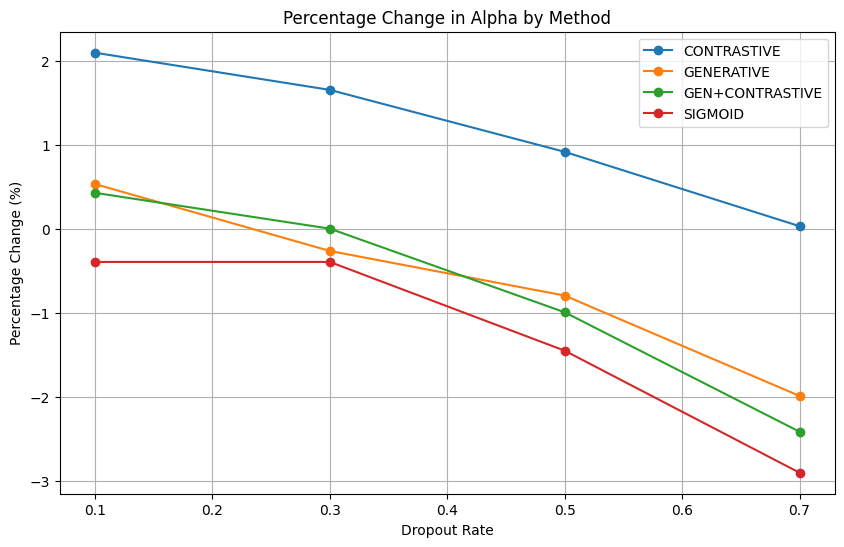

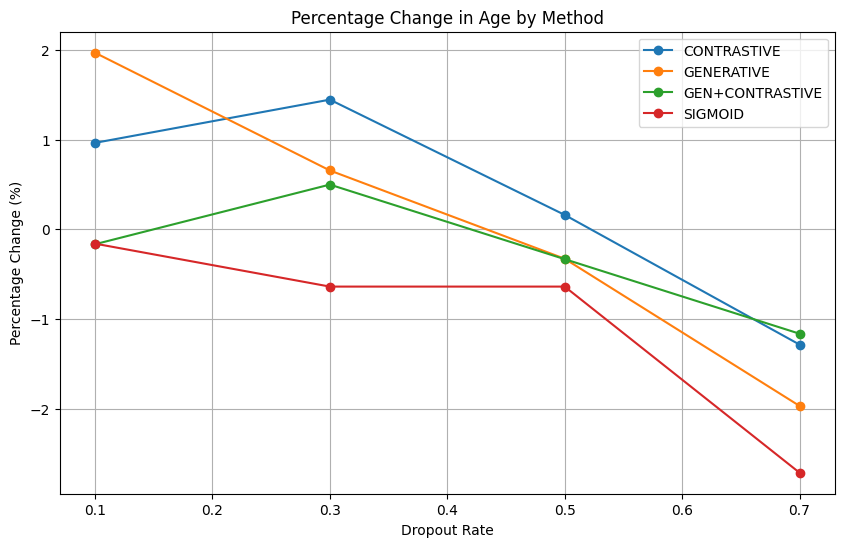

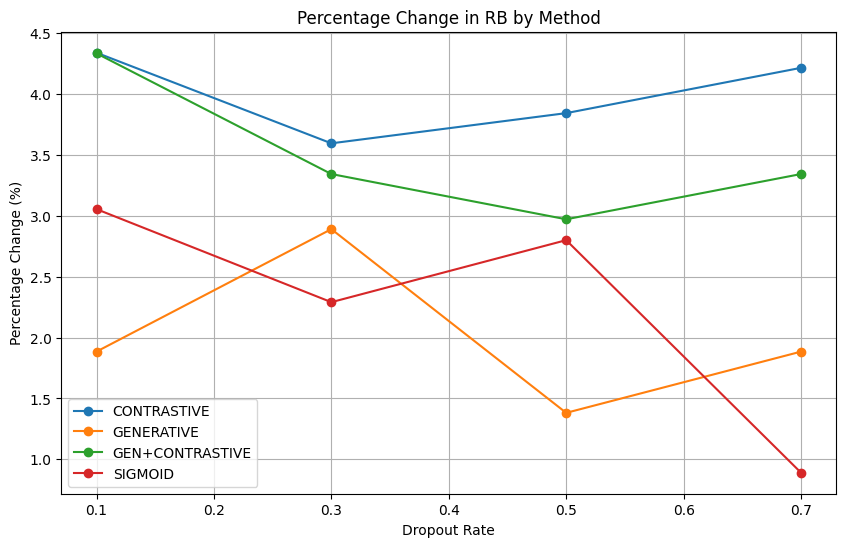

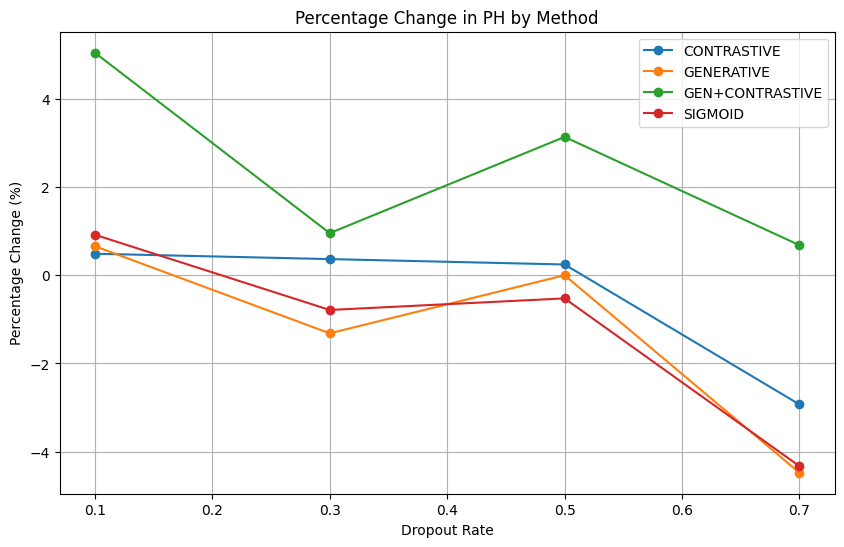

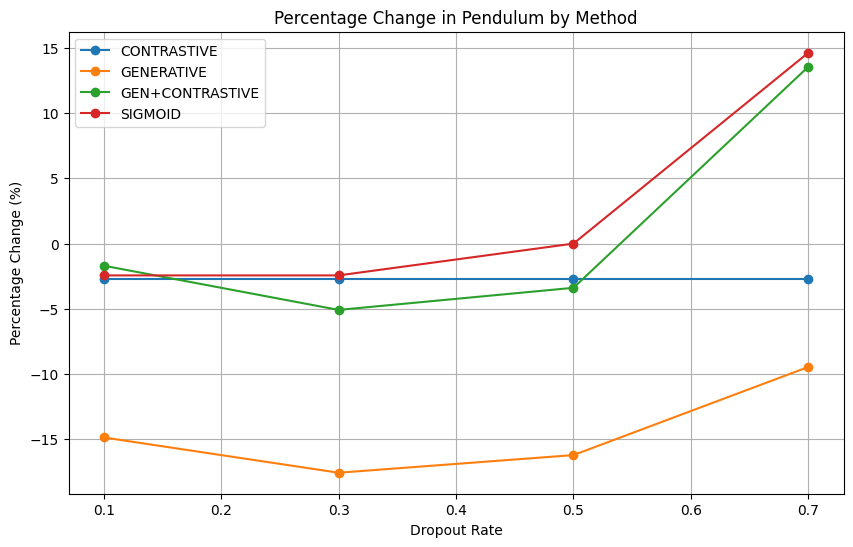

In [12]:
import matplotlib.pyplot as plt

# Extracting percentage changes for plotting
dropout_rates = [0.1, 0.3, 0.5, 0.7]
datasets = ["Alpha", "Age", "RB", "PH", "Pendulum"]
methods = list(percent_changes.keys())

# Creating a plot for each dataset
for dataset in datasets:
    plt.figure(figsize=(10, 6))
    for method in methods:
        changes = [percent_changes[method][dataset][i] for i in range(4)]
        plt.plot(dropout_rates, changes, label=method, marker='o')

    plt.title(f"Percentage Change in {dataset} by Method")
    plt.xlabel("Dropout Rate")
    plt.ylabel("Percentage Change (%)")
    plt.legend()
    plt.grid(True)
    plt.show()



In [13]:
# Adjusting the Pendulum dataset to reflect that lower values are better
# Inverting the percentage change for the Pendulum dataset
for method in methods:
    pendulum_changes = percent_changes[method]["Pendulum"]
    percent_changes[method]["Pendulum"] = [-change for change in pendulum_changes]

# Recalculating the mean percentage change across all datasets for each method and dropout rate
mean_changes = {method: [] for method in methods}

for method in methods:
    for i in range(len(dropout_rates)):
        mean_change = sum([percent_changes[method][dataset][i] for dataset in datasets]) / len(datasets)
        mean_changes[method].append(mean_change)


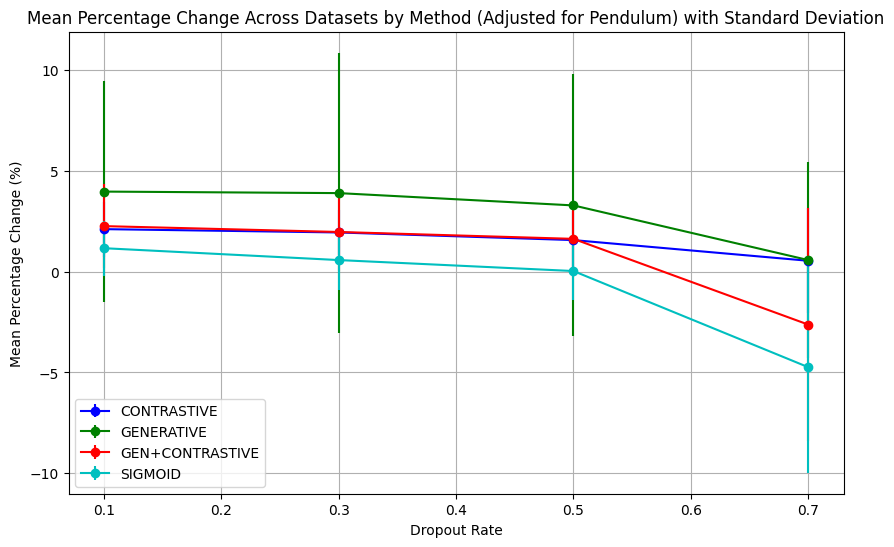

In [14]:
import numpy as np

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

# Calculating the mean and standard deviation of percentage change across all datasets for each method and dropout rate
mean_changes_with_std = {method: {'means': [], 'stds': []} for method in methods}

for method in methods:
    for i in range(len(dropout_rates)):
        changes = [percent_changes[method][dataset][i] for dataset in datasets]
        mean_change = np.mean(changes)
        std_change = np.std(changes)
        mean_changes_with_std[method]['means'].append(mean_change)
        mean_changes_with_std[method]['stds'].append(std_change)

# Plotting the mean changes with standard deviation as error bars
plt.figure(figsize=(10, 6))
for i, method in enumerate(methods):
    means = mean_changes_with_std[method]['means']
    stds = mean_changes_with_std[method]['stds']
    plt.errorbar(dropout_rates, means, yerr=stds, label=method, marker='o', color=colors[i % len(colors)])

plt.title("Mean Percentage Change Across Datasets by Method (Adjusted for Pendulum) with Standard Deviation")
plt.xlabel("Dropout Rate")
plt.ylabel("Mean Percentage Change (%)")
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [7]:
mean_changes_with_std

{'CONTRASTIVE': {'means': [0.3848659161076486,
   -0.6251859969787449,
   -0.4675165593940408,
   -3.076507362146164],
  'stds': [1.4111528214758802,
   1.0664827841189373,
   1.7588832661554215,
   2.603625266746981]},
 'GENERATIVE': {'means': [-1.1464951501315475,
   -0.11707599399705373,
   0.6226192217162142,
   -1.24676926916911],
  'stds': [2.1436151538202224,
   2.794877775070711,
   4.598286349011855,
   3.5484957787818336]},
 'GEN+CONTRASTIVE': {'means': [-0.15999254230482304,
   -0.9793194355072196,
   -1.283863081521849,
   -4.820760896924699],
  'stds': [0.7852205086965669,
   1.4912843890708414,
   1.3469701813134098,
   4.627204181633579]},
 'SIGMOID': {'means': [-0.7541992740859274,
   -2.4977486224233862,
   -3.2921717313538847,
   -8.126241781942404],
  'stds': [0.6514274591070679,
   1.843654101557982,
   1.6042712955219833,
   7.10216983846625]}}

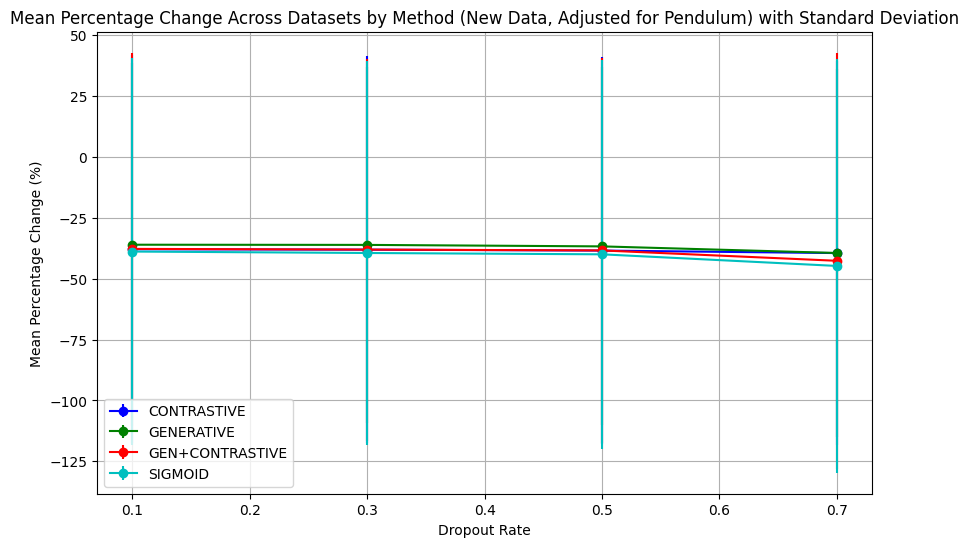

In [10]:
# New values after dropout
after_dropout_new = {
    "CONTRASTIVE": {
        "Alpha": [0.692, 0.689, 0.684, 0.678],
        "Age": [0.629, 0.632, 0.624, 0.615],
        "RB": [0.842, 0.836, 0.838, 0.841],
        "PH": [0.823, 0.822, 0.821, 0.795],
        "Pendulum": [0.36, 0.36, 0.36, 0.36]
    },
    "GENERATIVE": {
        "Alpha": [0.757, 0.751, 0.747, 0.738],
        "Age": [0.622, 0.614, 0.608, 0.598],
        "RB": [0.811, 0.819, 0.807, 0.811],
        "PH": [0.764, 0.749, 0.759, 0.725],
        "Pendulum": [0.63, 0.61, 0.62, 0.67]
    },
    "GEN+CONTRASTIVE": {
        "Alpha": [0.706, 0.703, 0.696, 0.686],
        "Age": [0.601, 0.605, 0.6, 0.595],
        "RB": [0.843, 0.835, 0.832, 0.835],
        "PH": [0.77, 0.74, 0.756, 0.738],
        "Pendulum": [0.58, 0.56, 0.57, 0.67]
    },
    "SIGMOID": {
        "Alpha": [0.754, 0.754, 0.746, 0.735],
        "Age": [0.626, 0.623, 0.623, 0.61],
        "RB": [0.81, 0.804, 0.808, 0.793],
        "PH": [0.769, 0.756, 0.758, 0.729],
        "Pendulum": [0.4, 0.4, 0.41, 0.47]
    }
}

original_values = {
    "CONTRASTIVE": {"Alpha": 0.6778, "Age": 0.623, "RB": 0.807, "PH": 0.819, "Pendulum": 0.37},
    "GENERATIVE": {"Alpha": 0.753, "Age": 0.610, "RB": 0.796, "PH": 0.759, "Pendulum": 0.74},
    "GEN+CONTRASTIVE": {"Alpha": 0.703, "Age": 0.602, "RB": 0.808, "PH": 0.733, "Pendulum": 0.59},
    "SIGMOID": {"Alpha": 0.757, "Age": 0.627, "RB": 0.786, "PH": 0.762, "Pendulum": 0.41}
}


# Inverting the percentage change for the Pendulum dataset in the new data
for method in methods:
    pendulum_changes_new = after_dropout_new[method]["Pendulum"]
    after_dropout_new[method]["Pendulum"] = [-change for change in pendulum_changes_new]

# Calculating percentage changes with the new data
percent_changes_new = {method: {} for method in original_values}
for method, datasets in after_dropout_new.items():
    for dataset, values in datasets.items():
        original_value = original_values[method][dataset]
        percent_changes_new[method][dataset] = [(value - original_value) / original_value * 100 for value in values]

# Calculating the mean and standard deviation of percentage change across all datasets for each method and dropout rate
mean_changes_with_std_new = {method: {'means': [], 'stds': []} for method in methods}
for method in methods:
    for i in range(len(dropout_rates)):
        changes = [percent_changes_new[method][dataset][i] for dataset in datasets]
        mean_change = np.mean(changes)
        std_change = np.std(changes)
        mean_changes_with_std_new[method]['means'].append(mean_change)
        mean_changes_with_std_new[method]['stds'].append(std_change)

# Re-plotting the mean changes with standard deviation for the new data
plt.figure(figsize=(10, 6))
for i, method in enumerate(methods):
    means = mean_changes_with_std_new[method]['means']
    stds = mean_changes_with_std_new[method]['stds']
    plt.errorbar(dropout_rates, means, yerr=stds, label=method, marker='o', color=colors[i % len(colors)])

plt.title("Mean Percentage Change Across Datasets by Method (New Data, Adjusted for Pendulum) with Standard Deviation")
plt.xlabel("Dropout Rate")
plt.ylabel("Mean Percentage Change (%)")
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

